# Statistical Data Analysis: Machine Learning Assignment

- Statistical Data Analysis (SPA6328)
- Academic Year: 2021-2022
- Module Organiser: Dr Seth Zenz
- Module Associate: Prof Adrian Bevan


## This assessment is for summative feedback: 15% OF TOTAL MODULE MARKS. This assignment has 30 marks total.

In this assignment you will analyse the iris data using decision tree (DT) based classifiers.  Specifically we are using a single DT as well as the AdaBoost DT.  By now you should be very familiar with the iris data, both in terms of the 1D and 2D information, and what you can learn from the 1D distributions in terms of the ability to separate the three different types of iris from each other.  Here we take the next step to use a machine learning algorithm to simultaneously benefit from the 4-dimensional feature space to separate signal from background. The steps in this assignment will be based around the idea that you **can** understand what the "black box" of a machine learning algorithm is doing, in terms of what you already know about 1d and 2d information.

## Task

Train a classifier using the iris data and study the performance characteristics of this classifier in detail by working through this notebook. You should work through and modify the cells appropriately, remembering to rerun multiple cells if required (e.g. to change a variable in one cell that another cell uses). There are a series of questions for you to answer, which appear in bold in two cells inside this notebook. Questions 1-4 refer to the DT example (first cell), while questions 5-9 are on the BDT code (all other cells).  

It is expected that you leave your worksheet in a state that clearly illustrates that you have completed the computations underpinning your answers and reflections. However, this does not mean you have to copy and paste cells for every single iteration.  


**Student:** Sergio Alfonso Calvo Ordoñez

**Student number:** 190865179

Load the sklearn Iris data

Iris data have been split into test and train samples
	N(train)             =  120
	N(test)              =  30
	Train split          =  0.8
	number_of_estimators =  10
	tree_depth           =  4
	min_leaf_size        =  1
Define, fit, and display the decision trees


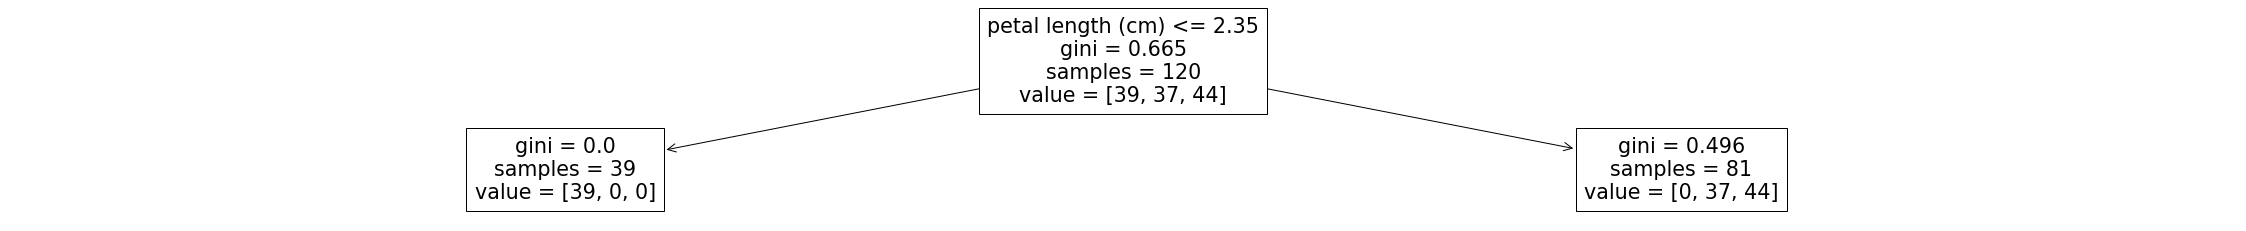

... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.6916666666666667  (This measure of performance is biased)
	Test Score  = 0.5667
	Number of mis-classified test data = 13.0, fraction of mis-classified examples = 0.433

Test confusion matrix (train) = 
 [[39  0  0]
 [ 0  0 37]
 [ 0  0 44]]

Test confusion matrix (test) = 
 [[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


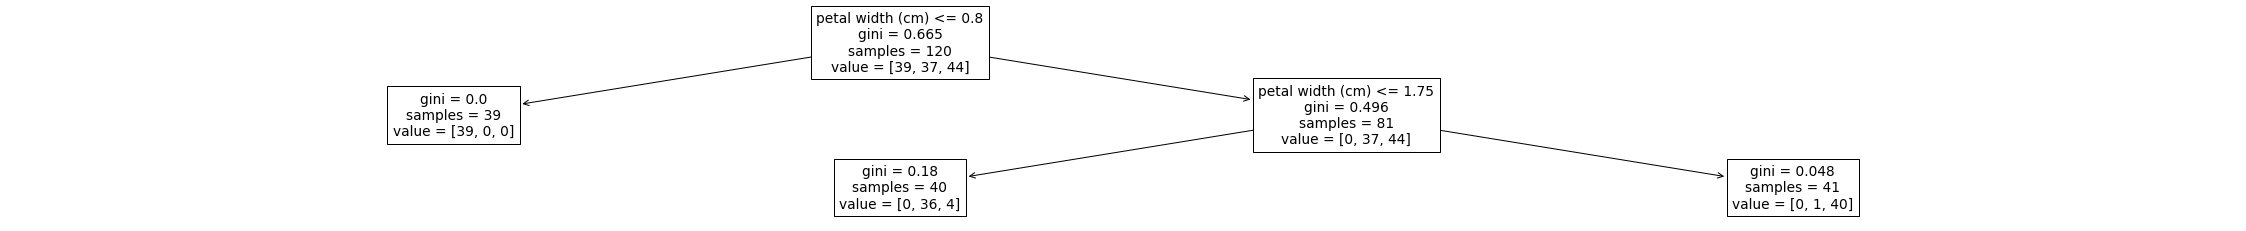

... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9583333333333334  (This measure of performance is biased)
	Test Score  = 0.9667
	Number of mis-classified test data = 1.0, fraction of mis-classified examples = 0.033

Test confusion matrix (train) = 
 [[39  0  0]
 [ 0 36  1]
 [ 0  4 40]]

Test confusion matrix (test) = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


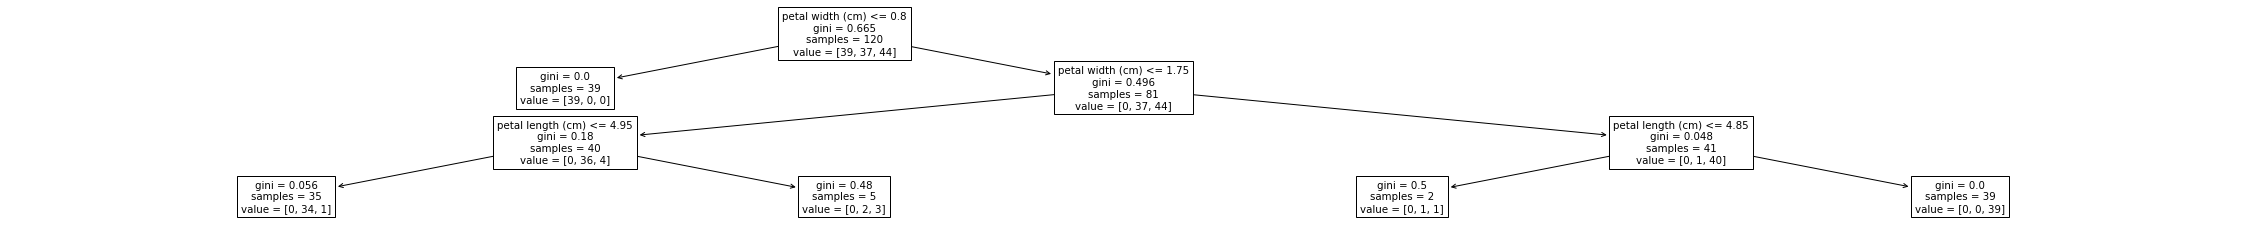

... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9666666666666667  (This measure of performance is biased)
	Test Score  = 0.9667
	Number of mis-classified test data = 1.0, fraction of mis-classified examples = 0.033

Test confusion matrix (train) = 
 [[39  0  0]
 [ 0 35  2]
 [ 0  2 42]]

Test confusion matrix (test) = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


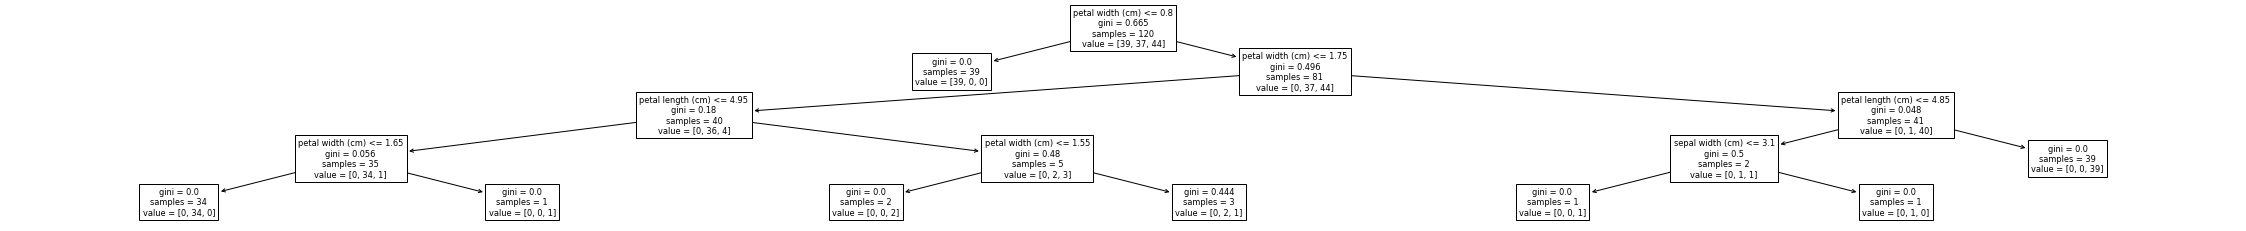

... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  0.9916666666666667  (This measure of performance is biased)
	Test Score  = 1.0000
	Number of mis-classified test data = 0.0, fraction of mis-classified examples = 0.000

Test confusion matrix (train) = 
 [[39  0  0]
 [ 0 37  0]
 [ 0  1 43]]

Test confusion matrix (test) = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
from sklearn.datasets import load_iris
#
# If having studied the iris data you wish to (not assessed) explore a larger data set, then the 
# NIST handwriting data (numbers 0, 1, 2, ... 9) can be loaded using load_digits. To use this one
# needs to change n_classes to 10.
#
# Uncomment the following line to import the load_digits function
#
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Parameters
n_classes = 10
train_split_size = 0.8     # the fraction of examples used for training
number_of_estimators = 10 # the number of boosting iterations
tree_depth    = 4          # number of divisions of data
min_leaf_size = 1          # minimum number of examples in a leaf

# Load data
print("\033[1mLoad the sklearn Iris data\033[0m\n")
iris = load_iris()
#print(iris)

# split the data into test and train samples. The train sample will be used to learn
# the model, and the test sample will be used to evaluate module performance.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, train_size=train_split_size)
print("Iris data have been split into test and train samples")
print("\tN(train)             = ", len(X_train))
print("\tN(test)              = ", len(X_test))
print("\tTrain split          = ", train_split_size)
print("\tnumber_of_estimators = ", number_of_estimators)
print("\ttree_depth           = ", tree_depth)
print("\tmin_leaf_size        = ", min_leaf_size)

#print(X_train)
#print(y_train)

print("\033[1mDefine, fit, and display the decision trees\033[0m")
for depth in range(1, 5):
    DT_clf0 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_leaf_size).fit(X_train,y_train)
    plot_tree(DT_clf0,feature_names=iris.feature_names)
    plt.show()

    print("... now compute the decision tree score")
    train_score = DT_clf0.score(X_train, y_train)
    test_score  = DT_clf0.score(X_test, y_test)

    print("\nDecision Tree Classifier Score is:")
    print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
    print("\tTest Score  = {:5.4f}".format(test_score))
    n_misclassified = (1-test_score)*len(X_test)
    print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))

    predictions_train = DT_clf0.predict(X_train)
    DTcm_train = confusion_matrix(y_train, predictions_train)
    print("\nTest confusion matrix (train) = \n", DTcm_train)

    predictions = DT_clf0.predict(X_test)
    DTcm = confusion_matrix(y_test, predictions)
    print("\nTest confusion matrix (test) = \n", DTcm)

The confusion matrix is to be read as follows:
 * For each row, the total number of entries is the true number of flowers in the class for that row
  * As always: 0 ='setosa', 1 = 'versicolor', 2 = 'virginica'
 * Within each row, each column in those rows is the number of flowers classified as 0,1,2.
 * So if our MVA algorithm was perfect, we would have a diagonal confusion matrix!
 
We can also produce these with normalisation. For example, here they are normalised to the number of true flowers in each row:

In [2]:
predictions_train = DT_clf0.predict(X_train)
DTcm_train = confusion_matrix(y_train, predictions_train,normalize='true')
print("\nConfusion matrix (train sample) = \n", DTcm_train)

predictions = DT_clf0.predict(X_test)
DTcm = confusion_matrix(y_test, predictions,normalize='true')
print("\nConfusion matrix (test sample) = \n", DTcm)


Confusion matrix (train sample) = 
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.02272727 0.97727273]]

Confusion matrix (test sample) = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


These questions refer to the decision tree code above.

**1. Comment on why the confusion matrix has more off-diagonal entries for the test sample.** [2 marks]

We can identify more off-diagonal entries for the test sample because the algorithm was not able to perfectly generalise with the entirety of the data. Off-diagonal entries mean that the algorithm made mistakes classifying these specific data points and therefore it is biased towards the training data. There are many potential reasons to why this might have happened, for example, it might be that these points are outliers to the rest of the dataset, or because the training data was not enough (qualitatively or quantitatively) for the decision tree to find all the relevant parameters in order to classify all of the data points in our dataset. When we get these types of results (the ML algorithm overperforms with the training data but does not do as well with the test data), we say that overtraining has happened, however, we should not say this with an accuracy metric of ~96%.

**2. Change the tree depth, considering all integers 1-4. Include all 4 plot_tree outputs in the final version of this notebook. Make a table of the train score and test score.** [6 marks]

In order of depth:

| Train Score | Test Score |
| -------- | -------- |
|   0.733  |   0.600  |
|   0.973  |   0.893  |
|  0.986   |   0.960  |
| 1.000    |   0.960  |


**3. Comment on the variables chosen by the algorithm (including depths 1-4). Are these consistent with the 2d plots from CoCalc assignment 1 and the conclusions from CoCalc Assignment 2? Comment on specific plots and specific variable differences to illustrate why they are consistent (or why not).** [5 marks]

The first observation that may result useful comes from the confusion matrices and the plots data distributions for each of the classes. Inside the matrices corresponding to the most accurate trees, we can see how they perfectly classify without any problem all of the data points corresponding to the class "setosa". This is consistent with the plots created in assignment 1, where we can see how the data points representing setosa petals are clearly separated from the other 2 classes, making it easier for the algorithm to classify these. In contrast, the most of the other plots, we can see how there are a few points that can easily be mis-classified due to their poor separation between them and the other nearest class; this explains why, no matter what depth we use, our algorithm seems incapable to correclty classify 100% of the test points correctly.

This is also backed up by the conclusions drawn during assigment 2, where we determined which variables for which classes are and are not distinguishible according to a 3 sigma test. The results of the confusion matrix are also consistent to these conclusions. For example, during the last branch of the trees, it is trying to make the cut using the sepal width, and during assigment 2 we concluded how it is not possible to distinguish between the classes using this variable according to our 3-sigma test and looking to the whole dataset. For the 50% of the data selected for training, this cut might work, but it clearly cannot be generalised to the rest of the data points.

In terms of the variables chosen, we can conclude that are consistent with the plots in assignment 1 as they are the ones that seem to be the ones that are the most isolated from each other and therefore have the clearest boundary/cut for classification. Also, from assignment 2, we already justified why petal width is a good variable to distinguish between classes, and, as we can see, it is also the variable chosen by almost all of the decision trees as the first cut. The same applies for petal lenght.

**4. Considering the depth 3 and depth 4 trees, do you see a pattern as to which cuts look most effective against the distributions as a whole? What is it?** [2 marks]

Obviously, we expect a difference in the final cut, as the depth 3 tree stops classifying one step earlier. This is the reason on the slight difference of train score. However, as we can see from the test scores being equal for both, we can conclude that the final cut for the 4 depth tree is biased towards the training set. This means that, when extrapolated to the entirety of data, this last cut is unnecesary and therefore, we can have an accurate decision tree with a lower depth and therefore faster runtime and training time, in general terms a lighter algorithm.

Define and fit a decision tree
... now compute the boosted decision tree score

Boosted decision Tree Classifier Score is:
	Train Score =  1.0  (This measure of performance is biased)
	Test Score  = 1.0000
	Number of mis-classified test data = 0.0, fraction of mis-classified examples = 0.000

Study the test data

confusion matrix (test) = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


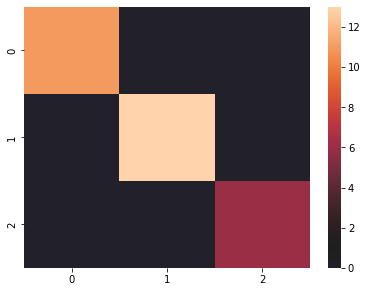

Truth	Prediction	P(type = 1)	P(type = 2)	P(type = 3)	Correct Prediction
2	2		0.0000		0.0000		1.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
1	1		0.0000		1.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
2	2		0.0000		0.0000		1.0000		True
0	0		1.0000		0.0000		0.0000		True
0	0		1.0000		0.0000		0.0000		True
1	1		0.000

In [20]:
# Code for Boosted Decision Tree

# Reset some parameters from before
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
# Parameters
n_classes = 3
train_split_size = 0.8 # Had to change this for question 7     # the fraction of examples used for training
number_of_estimators = 10 # the number of boosting iterations
tree_depth    = 3          # number of divisions of data
min_leaf_size = 1           # minimum number of examples in a leaf

print("\033[1mDefine and fit a decision tree\033[0m")
DT_clf  = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=min_leaf_size)
BDT_clf = AdaBoostClassifier(base_estimator=DT_clf, n_estimators=number_of_estimators).fit(X_train, y_train)

print("... now compute the boosted decision tree score")
train_score = BDT_clf.score(X_train, y_train)
test_score  = BDT_clf.score(X_test, y_test)

print("\nBoosted decision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
n_misclassified = (1-test_score)*len(X_test)
print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))

#
# Use the test data to compute a confusion matrix and to compare predictions against
# the ground truth labels.
#
print("\n\033[1mStudy the test data\033[0m")
predictions = BDT_clf.predict(X_test)
prob_predictions = BDT_clf.predict_proba(X_test)
BDTcm = confusion_matrix(y_test, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)
sns.heatmap(BDTcm, center=True)
plt.show()

#
# Compare the ground truth and model prediction
#
print("Truth\tPrediction\tP(type = 1)\tP(type = 2)\tP(type = 3)\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == y_test[i]:
        Match = True
    print("{:}\t{:}\t\t{:5.4f}\t\t{:5.4f}\t\t{:5.4f}\t\t{:}".format(y_test[i], predictions[i], prob_predictions[i][0], prob_predictions[i][1], prob_predictions[i][2], Match))

In [4]:
all_trees = BDT_clf.estimators_
print("There are %i trees in the BDT" % len(all_trees))

There are 1000 trees in the BDT


[Text(837.0, 142.69500000000002, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [0.325, 0.308, 0.367]'),
 Text(558.0, 101.92500000000001, 'gini = 0.0\nsamples = 39\nvalue = [0.325, 0.0, 0.0]'),
 Text(1116.0, 101.92500000000001, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0.0, 0.308, 0.367]'),
 Text(558.0, 61.155, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0.0, 0.3, 0.033]'),
 Text(279.0, 20.38499999999999, 'gini = 0.056\nsamples = 35\nvalue = [0.0, 0.283, 0.008]'),
 Text(837.0, 20.38499999999999, 'gini = 0.48\nsamples = 5\nvalue = [0.0, 0.017, 0.025]'),
 Text(1674.0, 61.155, 'petal length (cm) <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0.0, 0.008, 0.333]'),
 Text(1395.0, 20.38499999999999, 'gini = 0.5\nsamples = 2\nvalue = [0.0, 0.008, 0.008]'),
 Text(1953.0, 20.38499999999999, 'gini = 0.0\nsamples = 39\nvalue = [0.0, 0.0, 0.325]')]

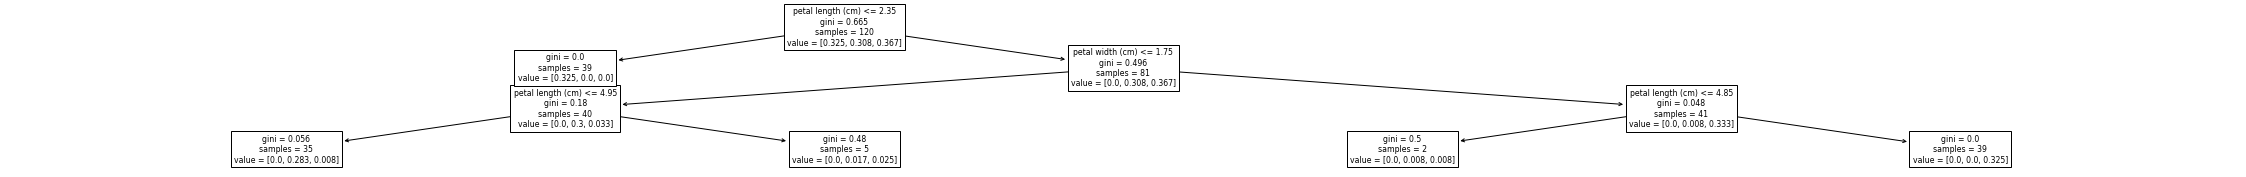

In [5]:
plt.rcParams["figure.figsize"] = (40,3)
plot_tree(all_trees[0],feature_names=iris.feature_names)

[Text(1116.0, 142.69500000000002, 'sepal width (cm) <= 2.75\ngini = 0.501\nsamples = 120\nvalue = [0.001, 0.499, 0.5]'),
 Text(558.0, 101.92500000000001, 'sepal length (cm) <= 4.95\ngini = 0.006\nsamples = 29\nvalue = [0.0, 0.414, 0.001]'),
 Text(279.0, 61.155, 'sepal width (cm) <= 2.45\ngini = 0.049\nsamples = 3\nvalue = [0.0, 0.0, 0.001]'),
 Text(139.5, 20.38499999999999, 'gini = 0.001\nsamples = 2\nvalue = [0.0, 0.0, 0.0]'),
 Text(418.5, 20.38499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.0, 0.001]'),
 Text(837.0, 61.155, 'sepal width (cm) <= 2.25\ngini = 0.0\nsamples = 26\nvalue = [0.0, 0.414, 0.0]'),
 Text(697.5, 20.38499999999999, 'gini = 0.337\nsamples = 3\nvalue = [0.0, 0.0, 0.0]'),
 Text(976.5, 20.38499999999999, 'gini = 0.0\nsamples = 23\nvalue = [0.0, 0.414, 0.0]'),
 Text(1674.0, 101.92500000000001, 'sepal length (cm) <= 5.95\ngini = 0.251\nsamples = 91\nvalue = [0.001, 0.085, 0.499]'),
 Text(1395.0, 61.155, 'petal length (cm) <= 2.65\ngini = 0.026\nsamples = 48\nva

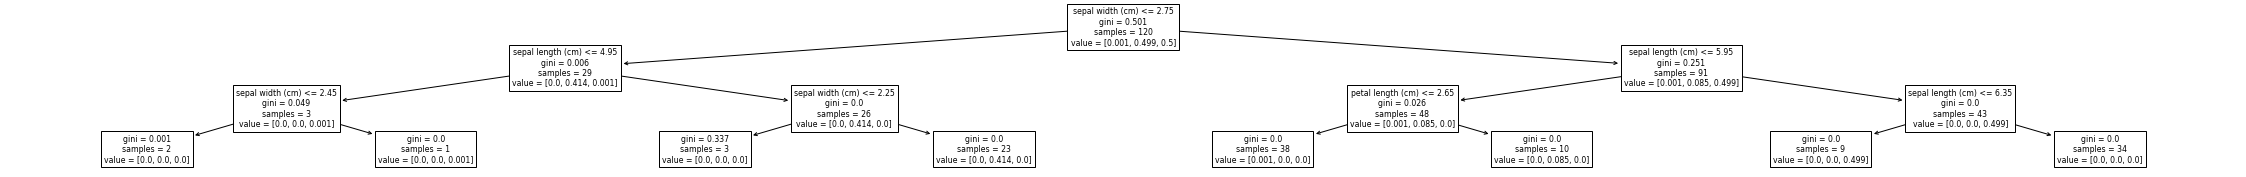

In [6]:
plot_tree(all_trees[9],feature_names=iris.feature_names)

[Text(837.0, 142.69500000000002, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [0.325, 0.308, 0.367]'),
 Text(558.0, 101.92500000000001, 'gini = 0.0\nsamples = 39\nvalue = [0.325, 0.0, 0.0]'),
 Text(1116.0, 101.92500000000001, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0.0, 0.308, 0.367]'),
 Text(558.0, 61.155, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0.0, 0.3, 0.033]'),
 Text(279.0, 20.38499999999999, 'gini = 0.056\nsamples = 35\nvalue = [0.0, 0.283, 0.008]'),
 Text(837.0, 20.38499999999999, 'gini = 0.48\nsamples = 5\nvalue = [0.0, 0.017, 0.025]'),
 Text(1674.0, 61.155, 'petal length (cm) <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0.0, 0.008, 0.333]'),
 Text(1395.0, 20.38499999999999, 'gini = 0.5\nsamples = 2\nvalue = [0.0, 0.008, 0.008]'),
 Text(1953.0, 20.38499999999999, 'gini = 0.0\nsamples = 39\nvalue = [0.0, 0.0, 0.325]')]

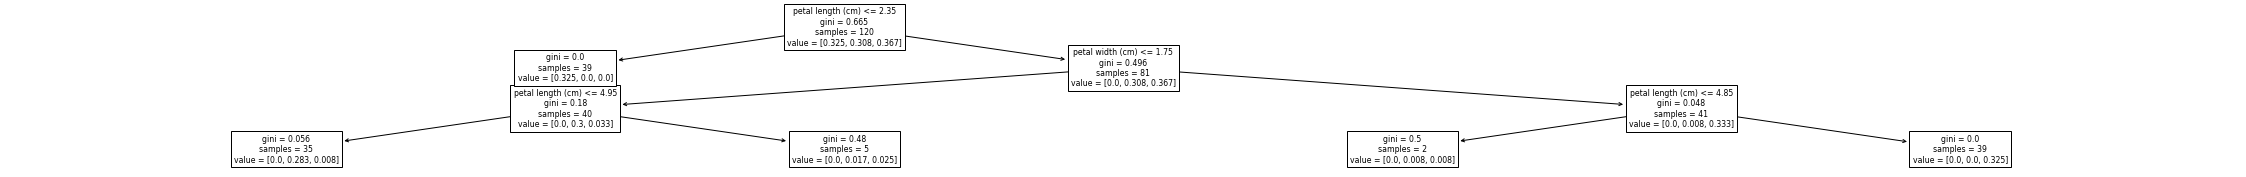

In [7]:
plot_tree(all_trees[0],feature_names=iris.feature_names)

These questions refer to the BDT cells above.

**5.: Compare the 0th tree to the Decision Tree in the first part of this assignment (for the same tree depth). What are the similarities and what are the differences? Bearing in mind that the Boosted tree normalises the sample to 1 at each step, are the trees roughly equally effective? Which of the differences can you account for, and which not?** [5 marks]

Printing the 0th tree, we can see that it has depth 2 and therefore we can compare it to the second decision tree generated above (also depth 2). We can appreciate several similarities throughout their structure. Firstly, they reached the same cutting criteria for each step, managing to classify the same amount of samples in each of the possible binary outputs. As we may deduce from this, we can also see that they have the same gini index for each of the branches. The only remarkable differences (this comes up due to the normalisation that goes in the boosted decision tree) are in the values contained in the value vector, however, they ultimately represent the same numbers. 

We can conclude both of this trees indeed are roughly equally effective.


**6. Using a train split of 0.5. Explore the effect of (a) changing the number of estimators, and (b) changing the tree depth, on the performance of the classifier. For this exercise tabulate results for including 10, 100, 500 and 1000 estimators (i.e. boosting iterations) and for tree depths of 1, 2, 3.  The result you give for each configuration should be the fraction of mis-classified test examples.** [5 marks]

| Split 0.5        | Depth 1     | Depth 2     | Depth 3    |
| -------------    | ----------- | ----------- |----------- |
| 10 estimators    |   0.080     |   0.040     |   0.040    |
| 100 estimators   |   0.080     |   0.040     |   0.040    |
| 500 estimators   |   0.080     |   0.040     |   0.040    |
| 1000 estimators  |   0.080     |   0.040     |   0.040    |


**7. Repeat the above using a train split of 0.8.** [2 marks]

| Split 0.8        | Depth 1     | Depth 2     | Depth 3    |
| -------------    | ----------- | ----------- |----------- |
| 10 estimators    |   0.033     |   0.000     |   0.000    |
| 100 estimators   |   0.100     |   0.033     |   0.000    |
| 500 estimators   |   0.100     |   0.000     |   0.033    |
| 1000 estimators  |   0.100     |   0.033     |   0.000    |

**8. What is the configuration that leads to the least fraction of mis-classified examples?** [1 mark]

There are several configurations that lead to a perfect score of 0 examples mis-classified. Given this, we should choose the configuration that is the simplest in order to classify the data points. This would be, using a training size of 0.8 (80% of the dataset), 10 estimators will be enough, and using a depth of 2.

**9. Why do you think, in detail, that any residual example(s) are mis-classified by the algorithm? If there are no mis-classified samples, is this what you expect? Comment in particular on the available testing sample size.** [2 marks]

As mentioned above, I believe that these cases in which the algorithm is mis-classifying some of the samples might have several explanations. In general, this might mean that there are outliers in your dataset (non-representative data), that the algorithm is undertrained, wrong algorithm selection, need of hyperparameter tuning, etc. Even if the training score is 1.0, we should not necessarily expect that the test score will be also 1.0, there can be a few reasons on why this will not happen. To mention some, this could be due to overtraining of the algorithm (therefore it does not generalise well to new data), poor decision of test and train sampling sizes,... More especifically, if we decide to focus on the testing and training sample size, we should consider that if we choose to have a a big testing sample size, then it will be more likely to find less common data points when testing and therefore end up undertraining our algorithm. For this reason, in general and when possible, a recommended distribution of the data is 80% for training and 20% for testing.